<a href="https://www.kaggle.com/code/danielgalper11/yaconomics-a-deep-dive-into-yac-over-expected?scriptVersionId=158114438" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# YAConomics: A Deep Dive into YAC Over Expected

By Daniel Galper

# I. Introduction
In the game of inches that is football, additional yards after contact (YAC) can mean the difference between first downs and fourth downs, touchdowns and field goals, and wins and losses. As a result, one of the most important skills for ball carriers to possess is the ability to grind out key YAC. In an era where running back value has diminished due to the realization that their success is highly dependent on factors outside of their control, the rate at which they generate YAC is one of the only metrics that can be attributed to their individual ability. Analyzing how defenders are able to prevent ball carriers from gaining YAC is also highly reflective of their individual skill-level and can be used to identify the best tacklers in the league.

Because there are many contextual factors that can influence how many YAC are gained on a play, using raw YAC numbers doesn’t fully isolate a player’s ability to win the YAC battle. By accounting for situational variables like the yardline, player orientation on the field, and player angle of movement, player skill-level can be identified easier. 

This project will analyze how effective players and teams are at generating or preventing yards after contact by creating a YAC expectation for every play. Using these expected values, ball carriers and defenders will be rewarded or punished for the actual YAC gained on each play, resulting in the metric YAC Over Expected. 





# II. Building the Model

**A. Data**

The “plays.csv”, “players.csv”, “games.csv”, “tackles.csv” and tracking data for weeks 1-9 of the 2022 season were used in my analysis. Using tracking data, the player who made first contact with the ball carrier was identified by finding which defender was closest to them at the moment tagged as “first_contact”. I was also able to further use the tracking data to extract variables that shed insight into the dynamics of how both the ball carrier and defender were moving at the moment of first contact.

The most important variables that were engineered from the existing data were the orientation and angle of motion of the ball carrier and first contact defender at the moment of first contact. To create these variables, the end zone that the offense was driving towards was defined using the orientation of the ball carrier at the moment of the snap. Once this was set, orientation and player motion was measured in degrees with respect towards the end zone that the offense was attacking.

After experimenting with different modeling techniques, the best model was produced when using Multiple Linear Regression. Some variables that were used in the regression model were already contained in the given datasets and some were engineered manually.
 
List of variables used in the YAC model:
* **Defender Orientation**: Represents the orientation of a first contact defender with respect to their own end zone at the moment of first contact. Values range from 0 degrees, which occurs when a defender is directly facing the end zone they are defending, to 180 degrees, which occurs when a defender is directly facing their opponent's end zone. 
* **Ball Carrier Orientation**: Represents the orientation of a ball carrier with respect to their own end zone at the moment of first contact. Values range from 0 degrees, which occurs when a ball carrier is directly facing directly the end zone they are attacking, to 180 degrees, which occurs when a ball carrier is directly facing their own end zone. 
* **Defender Angle of Movement**: Represents the angle of a first contact defender’s movement with respect to their own end zone at the moment of first contact. Values range from 0 degrees, which occurs when a defender is moving directly towards the end zone they are defending, to 180 degrees, which occurs when a defender is moving directly towards their opponent’s end zone.
* **Ball Carrier Angle of Movement**: Represents the angle of ball carrier movement with respect to their own end zone at the moment of first contact. Values range from 0 degrees, which occurs when a ball carrier is moving directly towards the end zone they are attacking, to 180 degrees, which occurs when a defender is moving directly towards their own end zone.
* **Defender Speed**: Speed that a first contact defender is moving at the moment of first contact (yards/second)
* **Ball Carrier Speed**: Speed that a ball carrier is moving at the moment of first contact (yards/second)
* **Defender Speed**: Weight of the first contact defender (lbs)
* **Ball Carrier Weight**: Weight of the ball carrier (lbs)
* **Defender Distance from Ball Carrier**: Distance between the first contact defender and ball carrier at the moment of first contact (yards)
* **Absolute Yardline Number**: Distance from the end zone.
* **Yards Before First Contact**: Yards gained by the ball carrier before first contact.










**B. Model Evaluation**

Figure 1 shows the scaled importance of each variable in generating the expected YAC values.
The most important variables in predicting yards after contact were the distance between the defender and the ball carrier at the moment of first contact, and both player’s speeds at the moment of first contact.

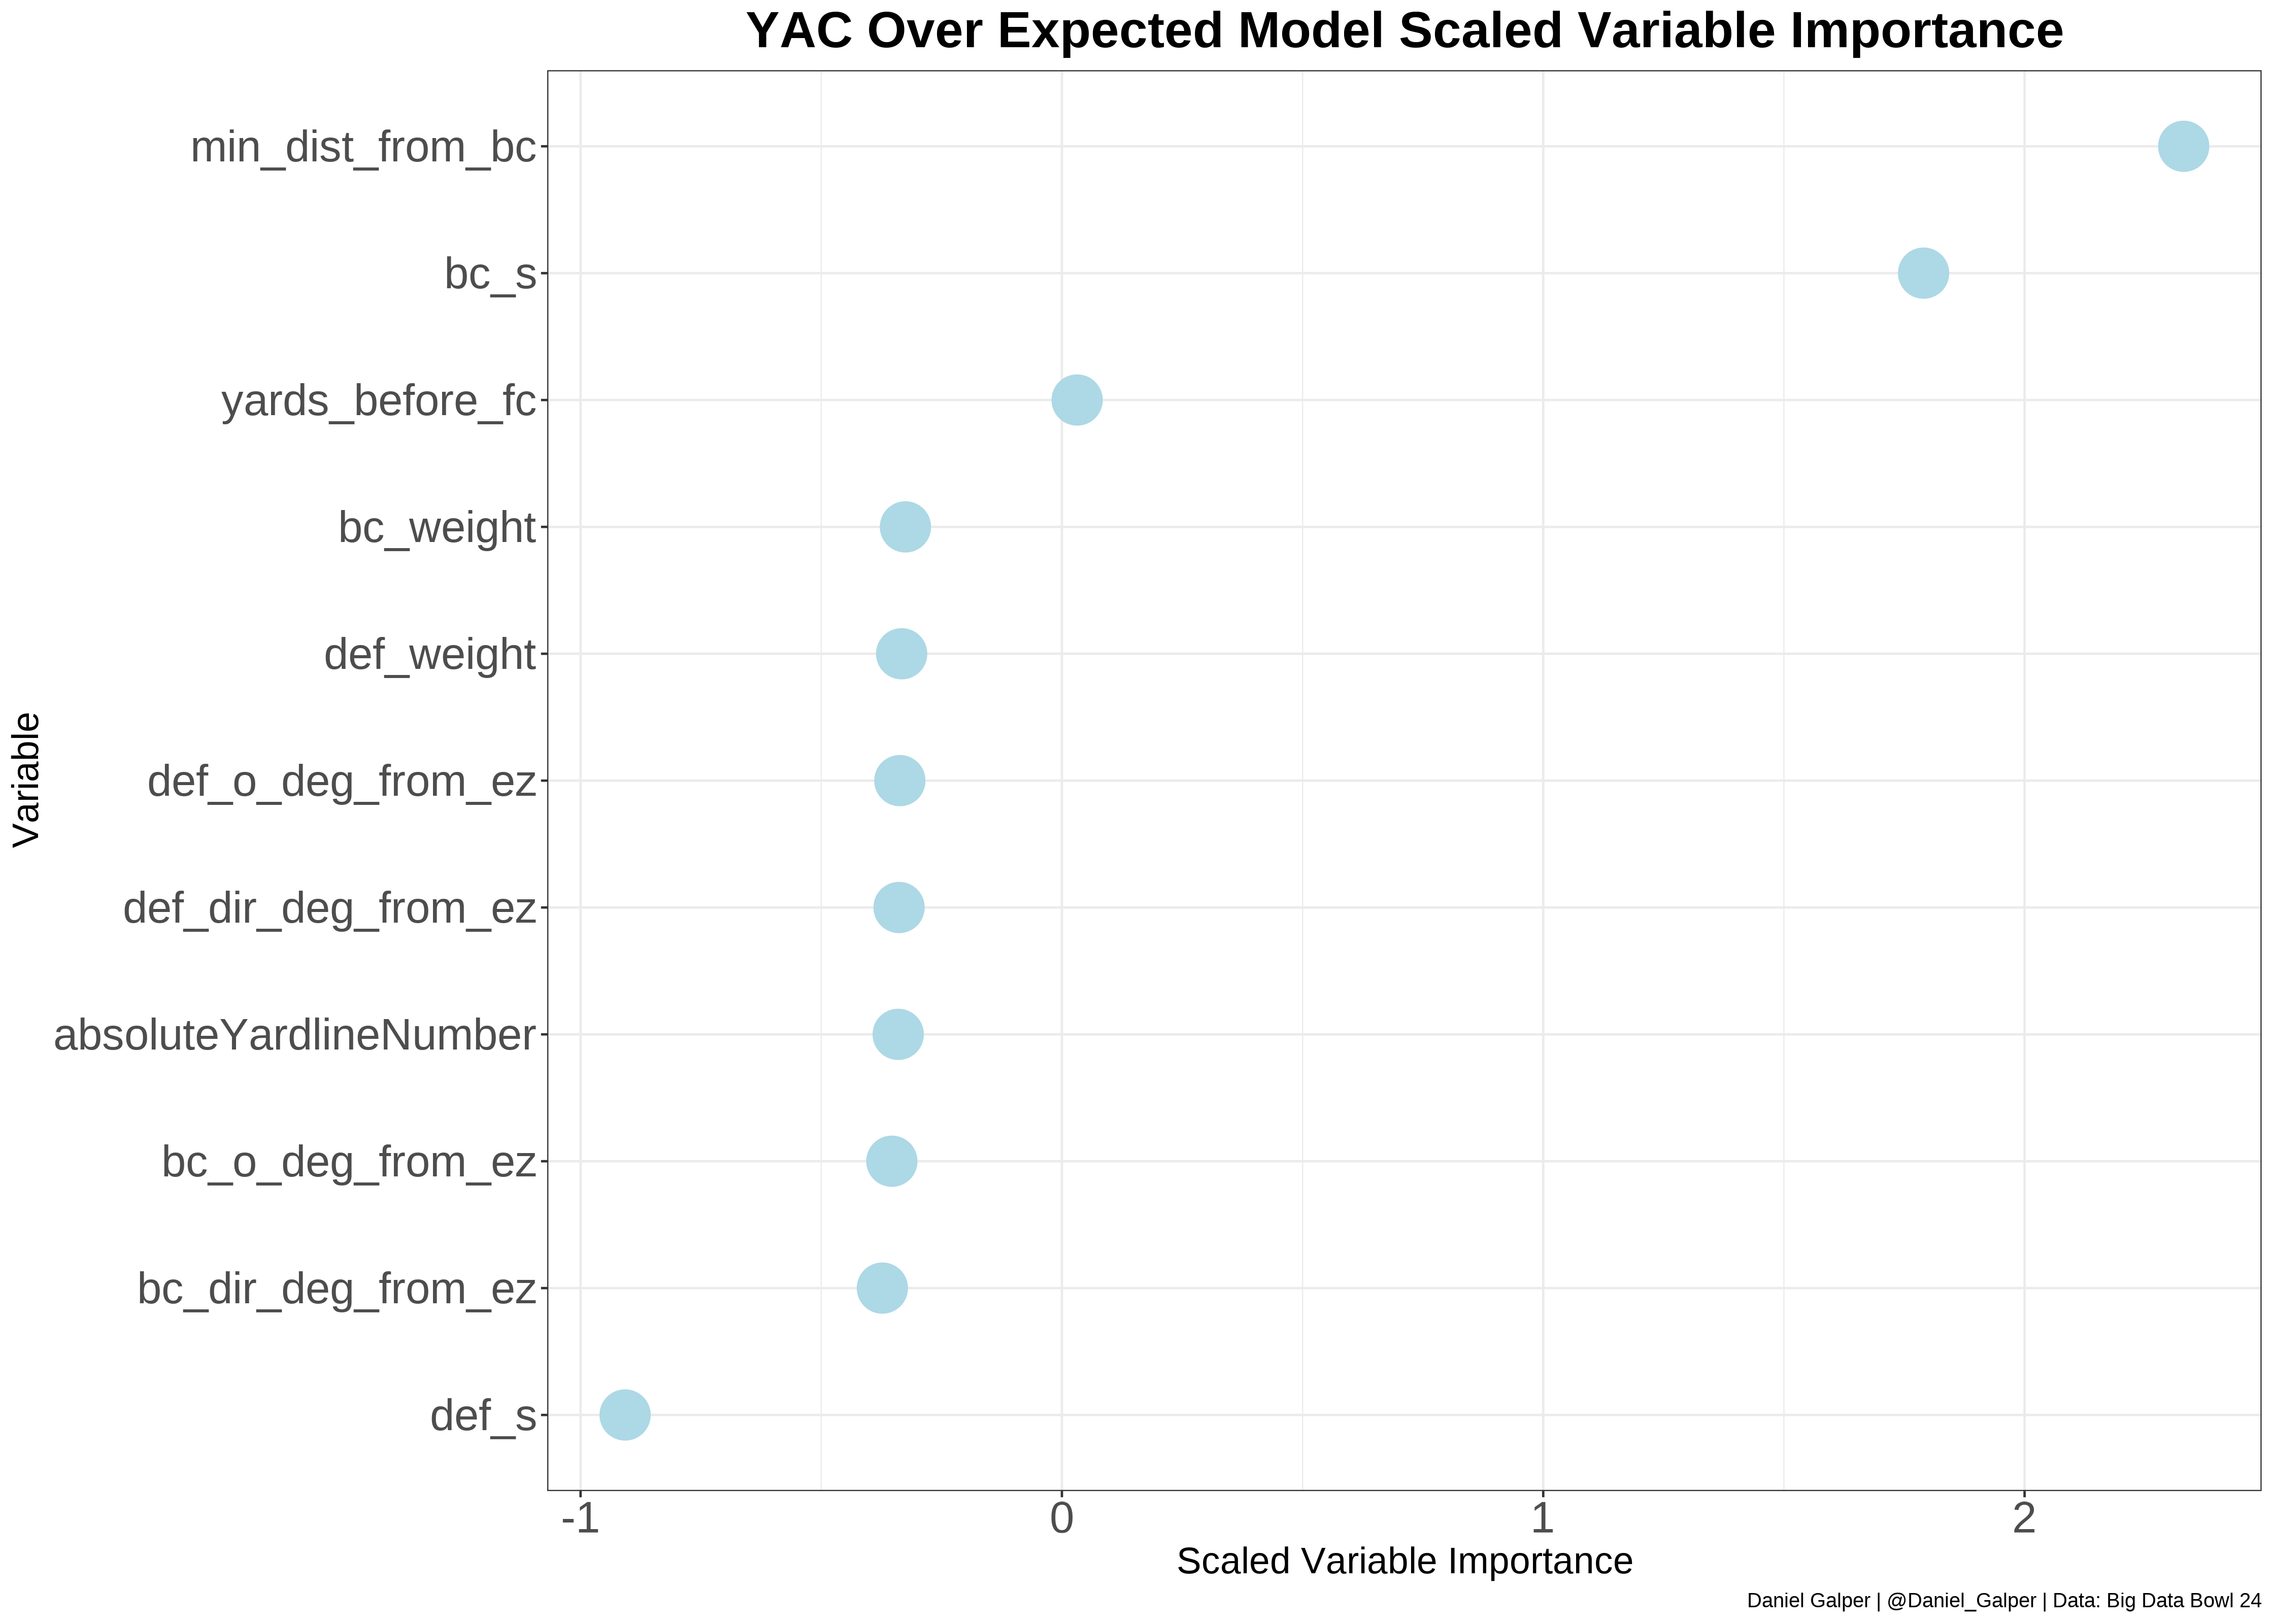

In [1]:
from IPython.display import Image, display, HTML

# Set the desired width and height
width = 1000
height = 900

# Display the image with the specified width and height
image_path = "/kaggle/input/bdb-data-viz/data_viz/var-importance.png"
display(Image(filename=image_path, width=width, height=height))

#from IPython.display import Image
#Image("/kaggle/input/bdb-data-viz/data_viz/var-importance.png")

This makes intuitive sense as a defender being farther away from a ball carrier increases the likelihood of the nature of contact being an arm tackle, which is far easier for an offensive player to break through. Of course, if a ball carrier is moving faster they are more likely to gain more YAC and if a defender is moving faster they are more capable of stopping a ball carrier’s momentum and preventing YAC. 

Another coefficient result that appears intuitive is the negative relationship between expected YAC and the ball carrier’s orientation and angle. Because lower degree values correspond to a ball carrier directly facing the endzone they are attacking, it makes sense that higher values would correlate with less YAC as the ball carrier would not be moving directly forward at the moment of first contact. 

Additionally, defender orientation and angle is also negatively correlated with expected YAC. Again, this relationship is logical as higher degree values indicate a defender has their back to their own end zone, which means they are able to push a ball carrier backwards and limit YAC.

Using these variables to predict yards after contact, the model had a Root Mean Square Error of 2.84 and an Adjusted R-Squared of 0.236. As shown in Figure 2, the model’s RMSE was harmed significantly by plays with large YAC values. 


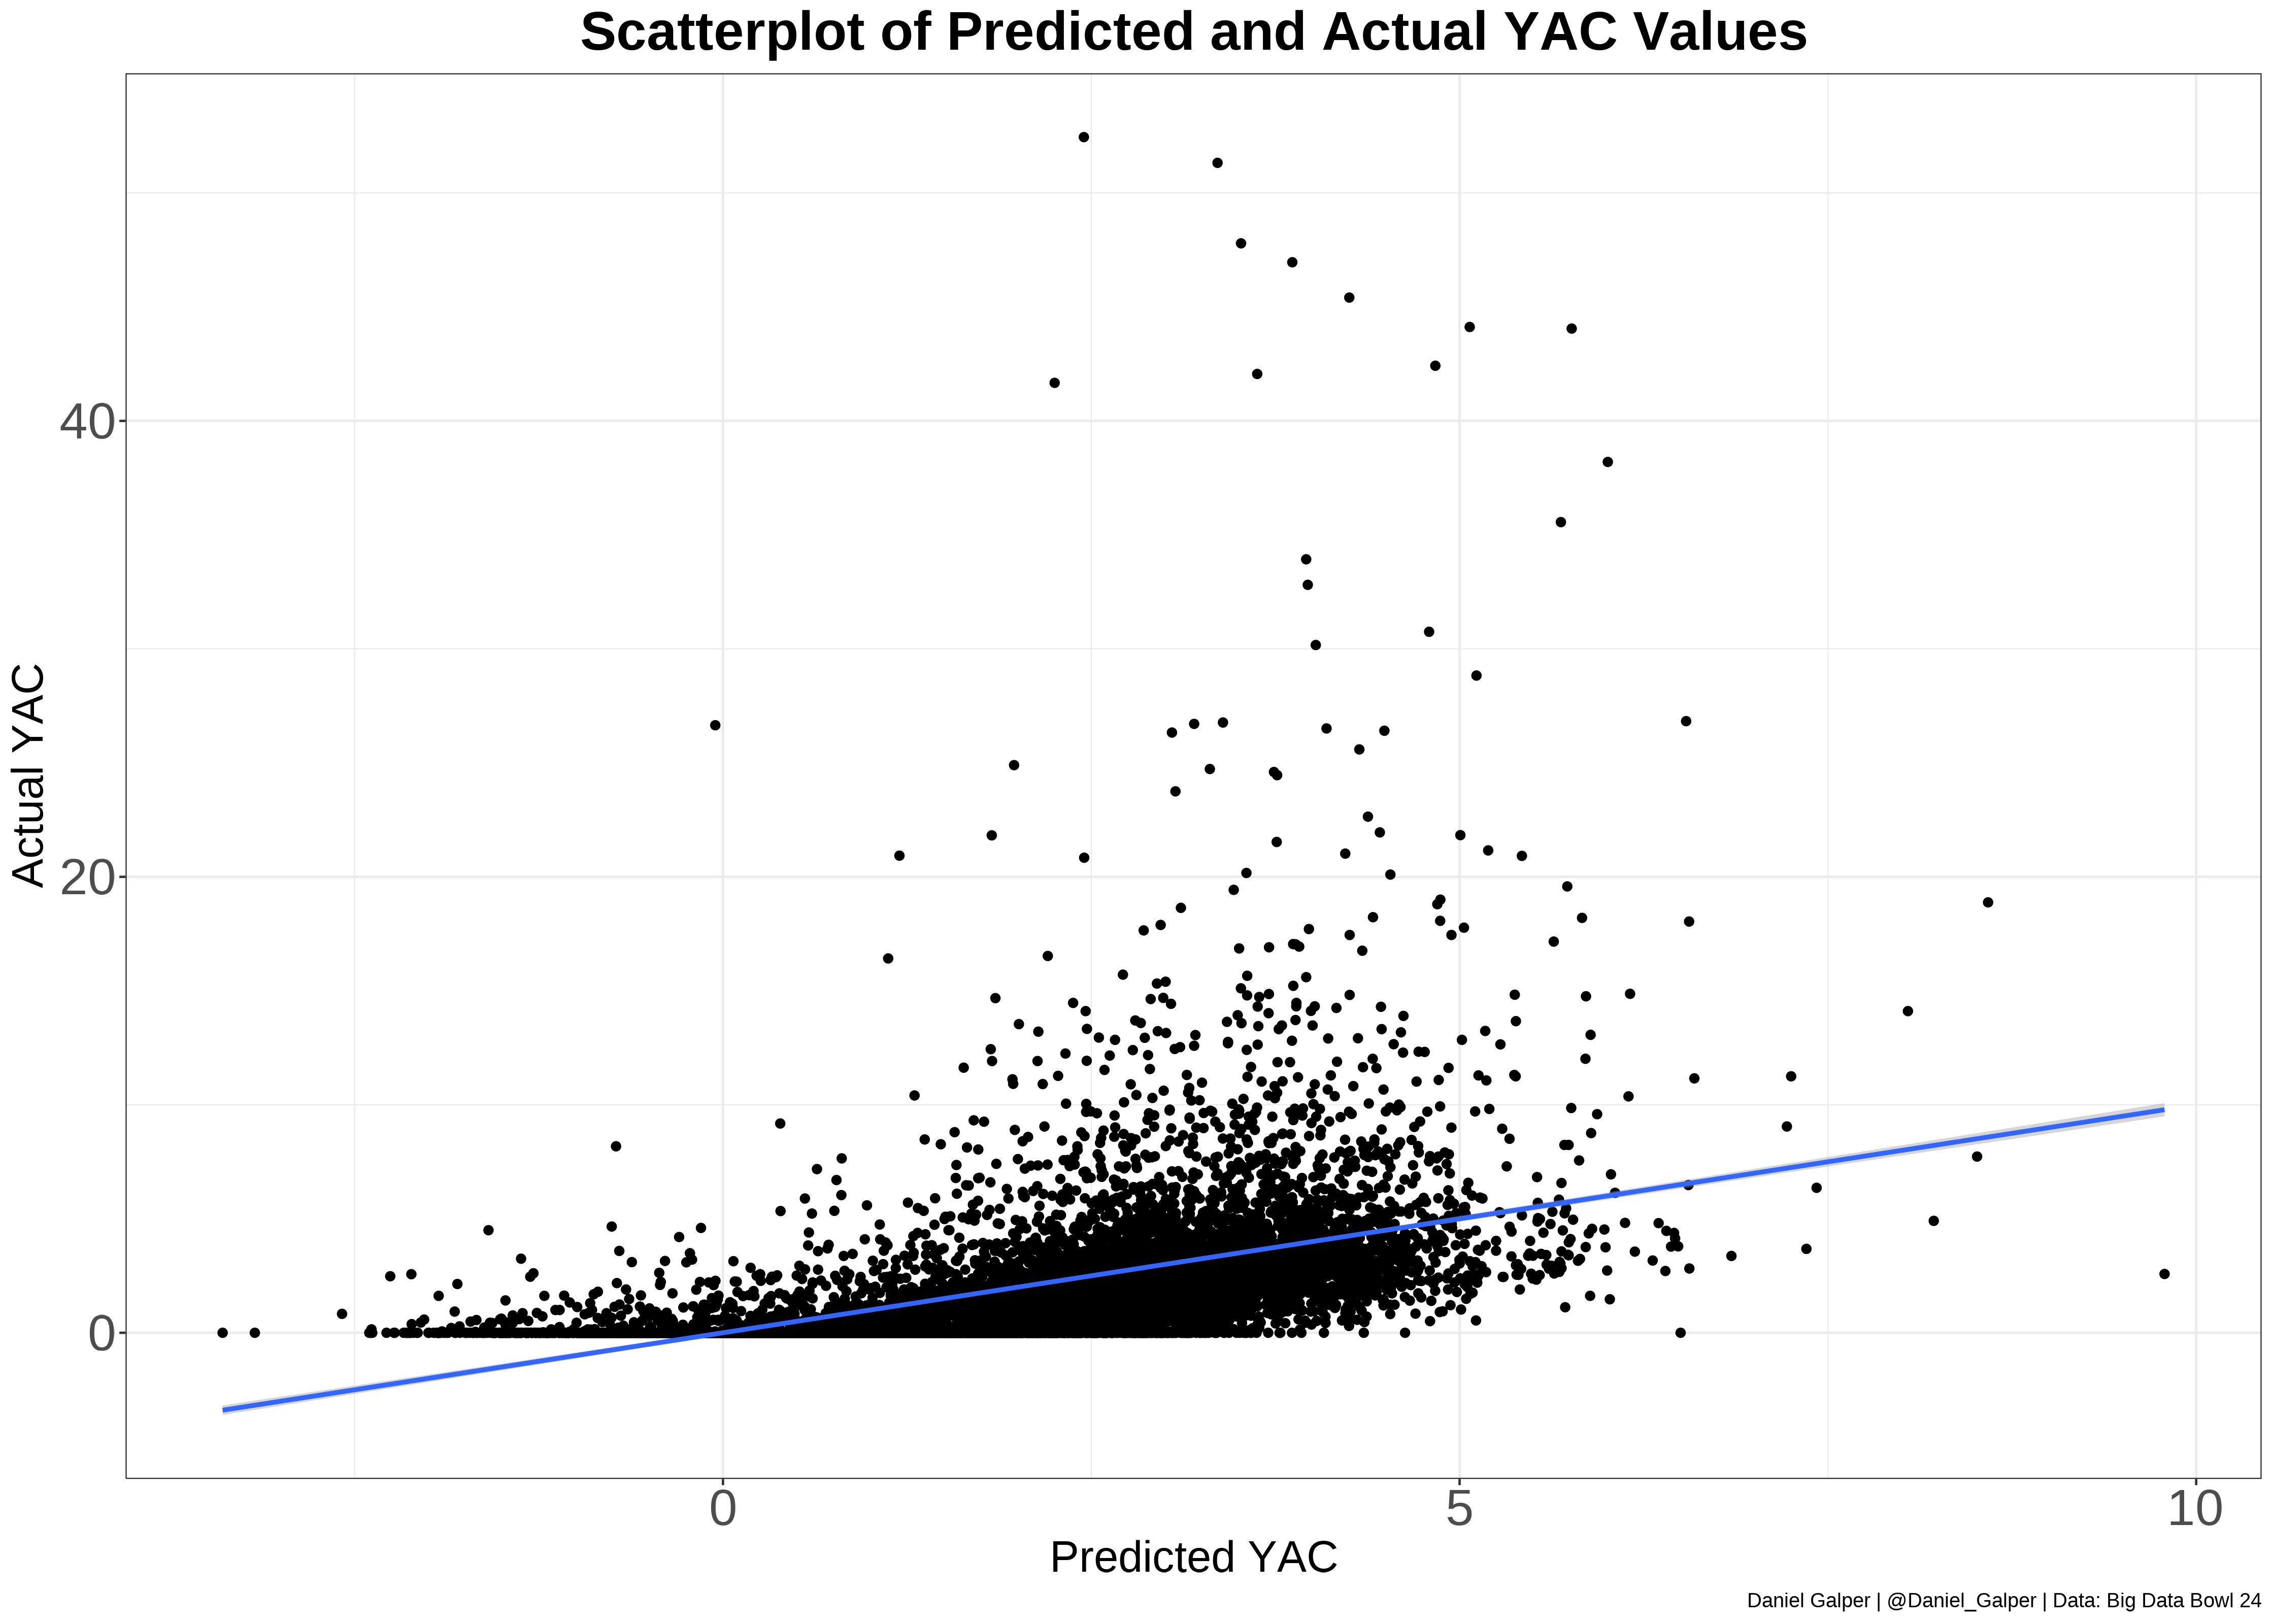

In [2]:
# Set the desired width and height
width = 1000
height = 900

# Display the image with the specified width and height
image_path = "/kaggle/input/bdb-data-viz/data_viz/yac-pred-scatterplot.png"
display(Image(filename=image_path, width=width, height=height))



These are likely plays where a runner broke a tackle and ran for a significant gain, which the model was unable to predict. Results like this are hard to avoid when modeling YAC as these types of plays will always occur and increase a model’s average error.


**C. Player-Level and Team-Level Results:**

Individual and team performance can be analyzed with YAC Over Expected. For evaluation purposes, I also created a secondary metric called YAC Over Expected Success Rate, which measures the percentage of plays that resulted in positive YAC Over Expected. Using this metric limits the ability of a few big plays to skew a player’s overall statistics. This is especially important for defenders, who may be punished for their teammates missing additional tackles after they fail to bring a ball carrier down. 

Figures 3 and 4 show how defenders fared when making first contact from weeks 1 through 9 of the NFL season. Patriots defensive lineman Davon Godchaux created the most negative YAC Over Expected. 


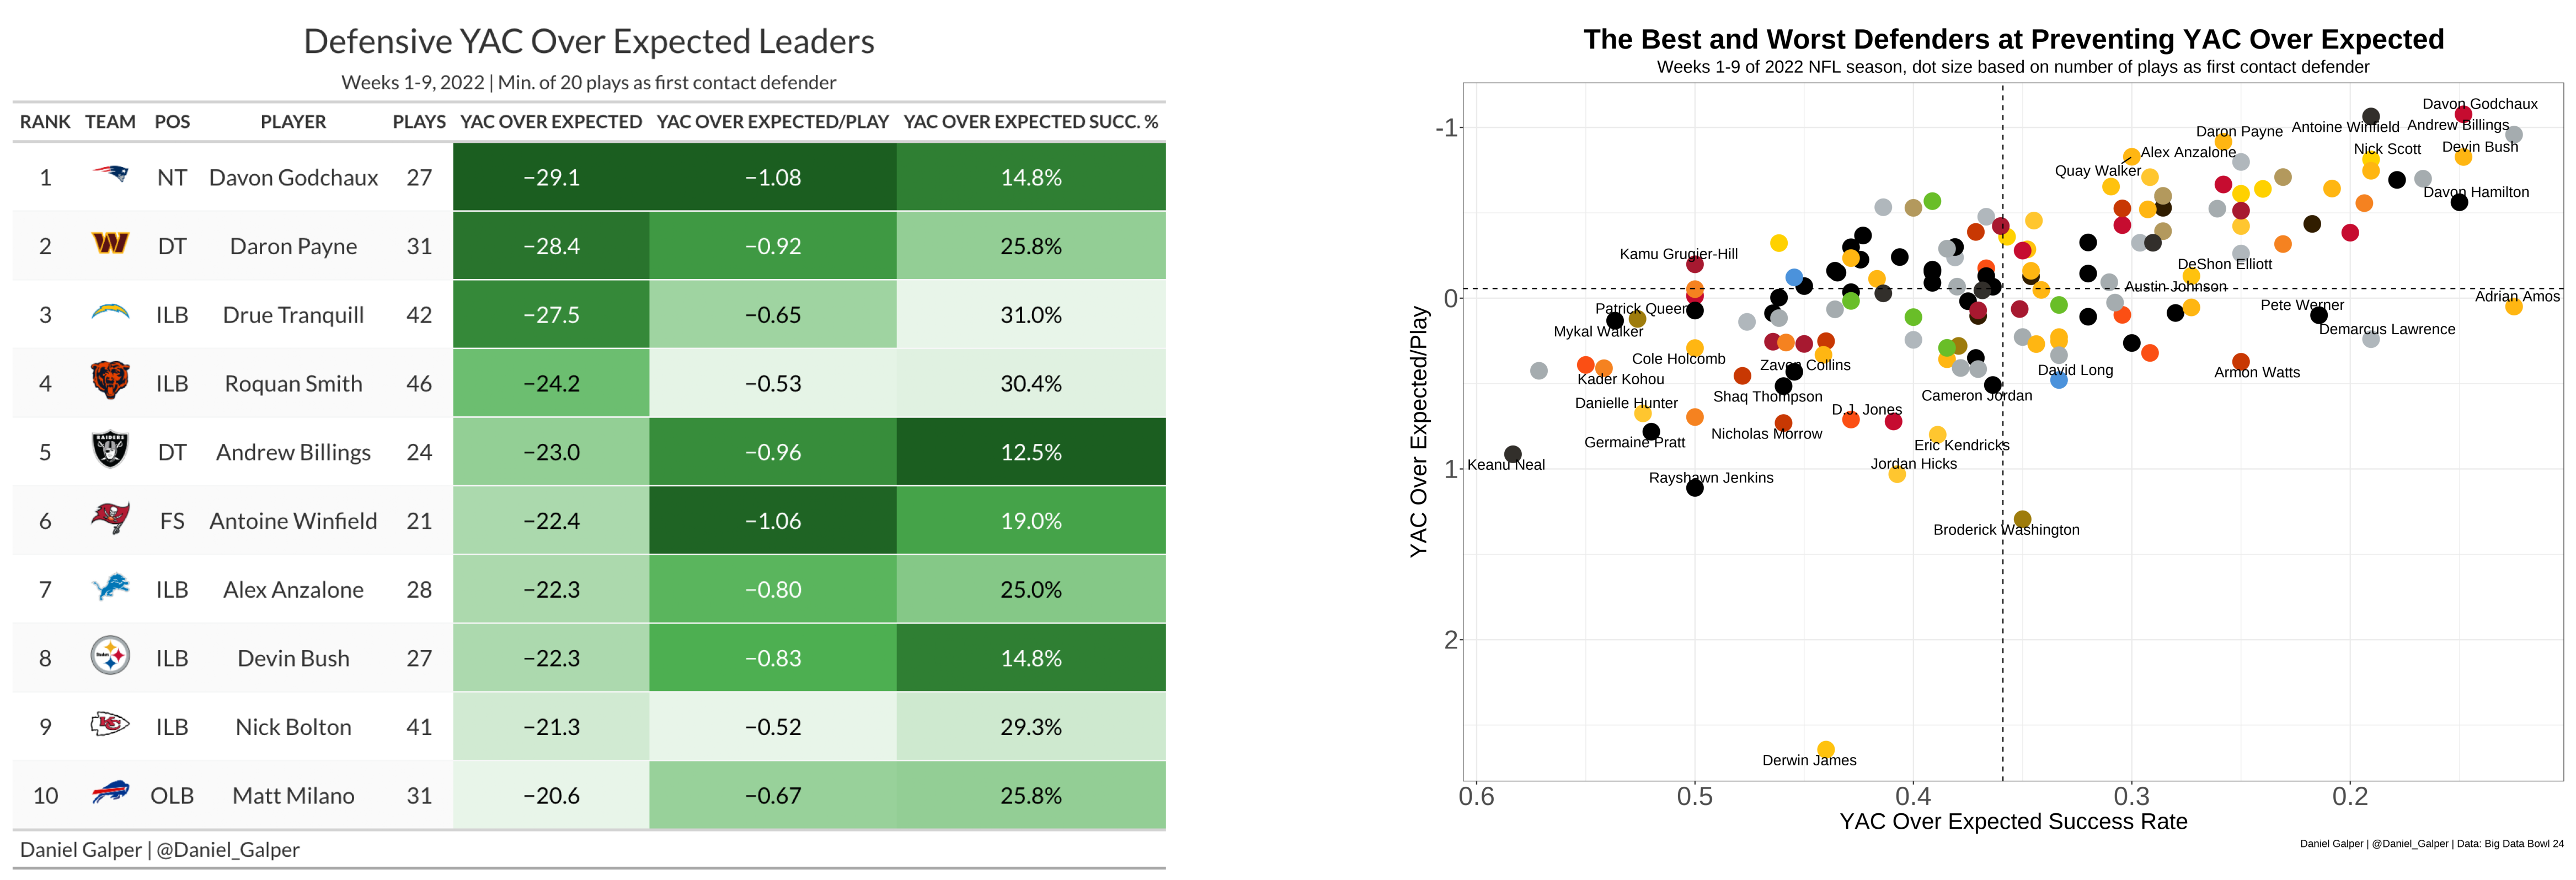

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Set the desired width and height
width = 1000
height = 900

# Image paths
image_path1 = "/kaggle/input/bdb-data-viz/data_viz/xyac-defnders.png"
image_path2 = "/kaggle/input/bdb-data-viz/data_viz/def-performance-scat.png"

# Load images
img1 = imread(image_path1)
img2 = imread(image_path2)

# Display images side by side
fig, axes = plt.subplots(1, 2, figsize=(60, 30))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

plt.show()


Other standouts include fellow defensive lineman Daron Payne and Chargers linebacker Drue Tranquill. Raiders defensive tackle Andrew Billings led all defenders in YAC Over Expected Success Rate, which may be the more predictive metric for evaluating individual defenders.  

Figures 5 and 6 display ball carrier performance. Familiar faces like Josh Jacobs and Derrick Henry show up at the top of the league in YAC Over Expected. Deebo Samuel accumulated by far the most YAC Over Expected amongst pass catchers and was the only non-running back to
crack the top 10.


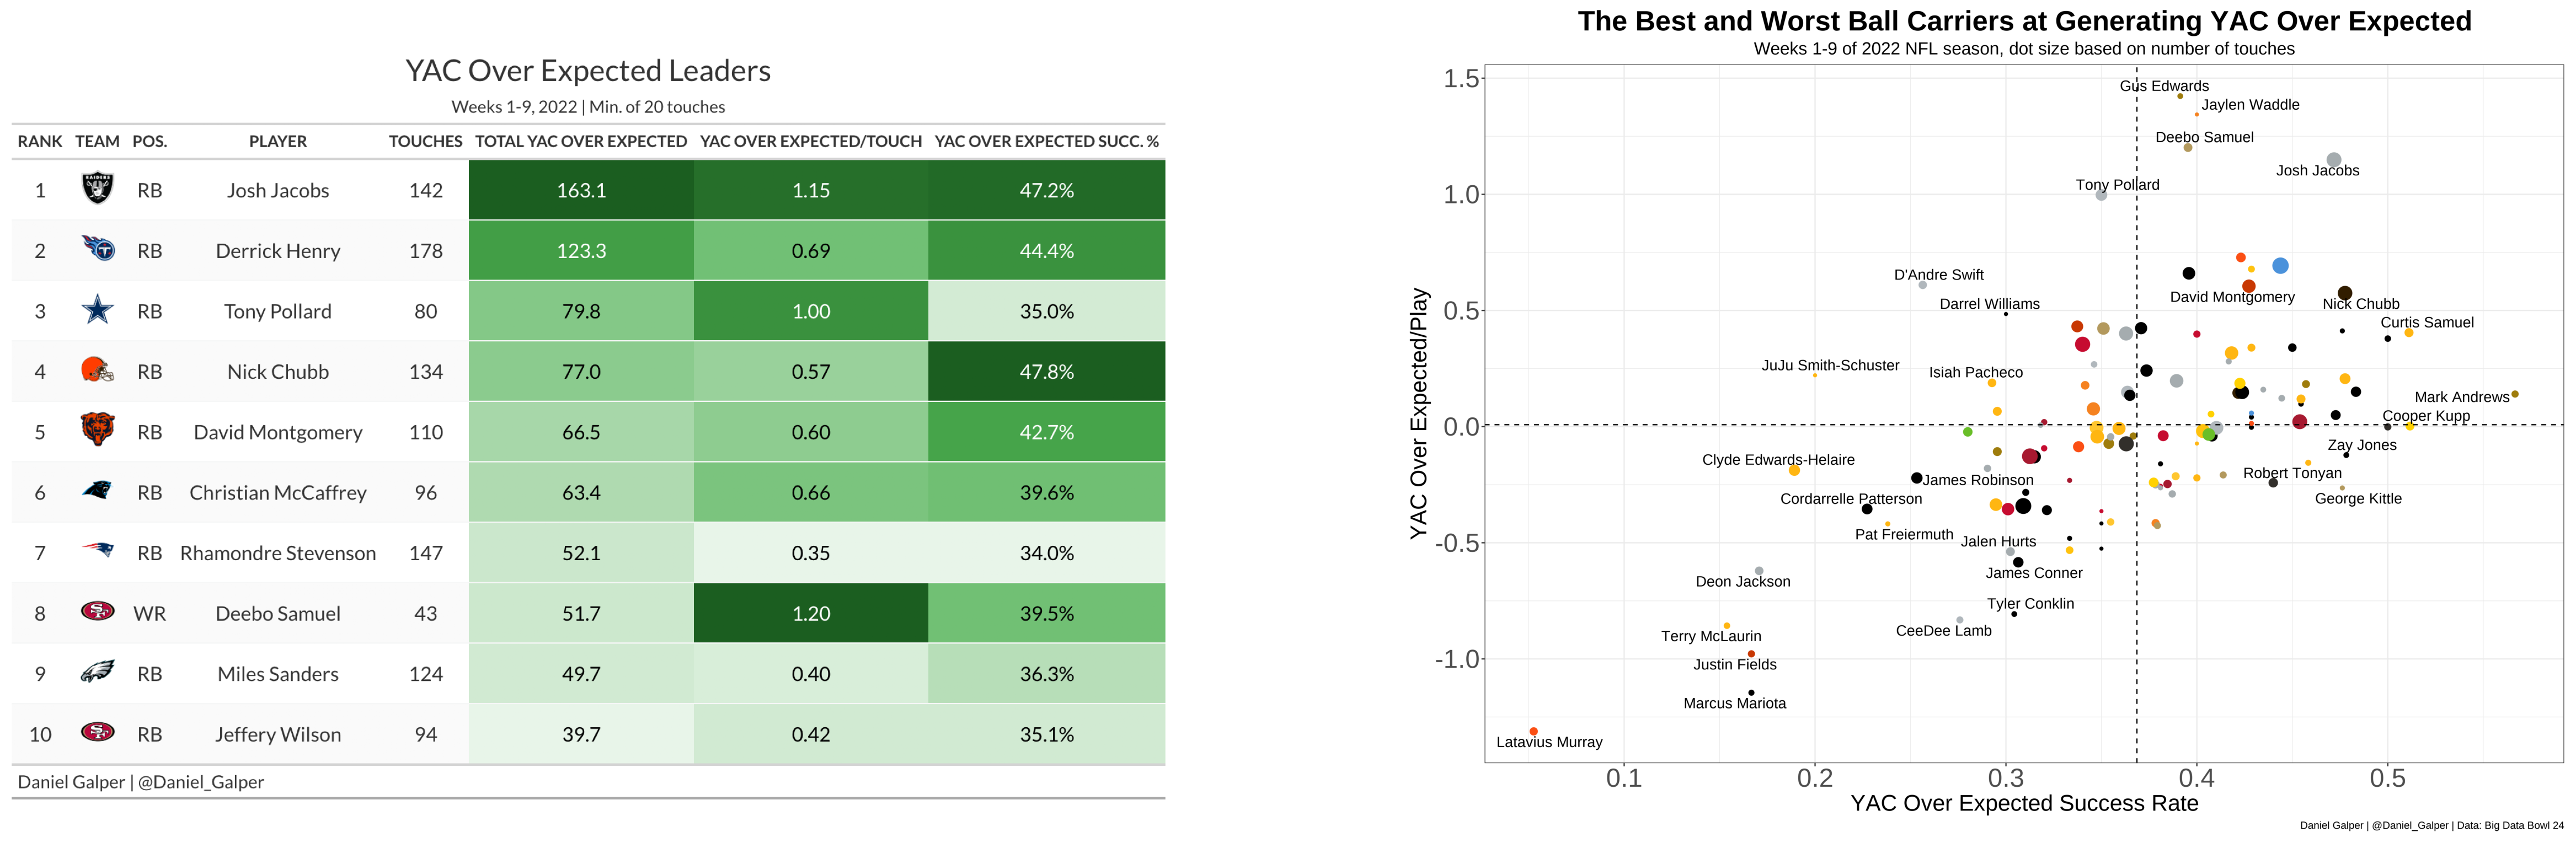

In [4]:
# Set the desired width and height
width = 1000
height = 900

# Image paths
image_path1 = "/kaggle/input/bdb-data-viz/data_viz/xyac-bc.png"
image_path2 = "/kaggle/input/bdb-data-viz/data_viz/bc-performance-scat.png"

# Load images
img1 = imread(image_path1)
img2 = imread(image_path2)

# Display images side by side
fig, axes = plt.subplots(1, 2, figsize=(60, 30))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

plt.show()

Interestingly, Ravens tight end Mark Andrews led the league in YAC Over Expected Success Rate. Receivers Cooper Kupp, Curtis Samuel and Garrett Wilson were all very impressive after the catch and first contact. 

Figure 7 shows how teams fared at generating and limiting YAC Over Expected. Largely thanks to Jacobs, the Raiders led the league in Offensive YAC Over Expected while the Rams led the league in Defensive YAC Over Expected behind the strong play of Jalen Ramsey, Nick Scott, and Aaron Donald.

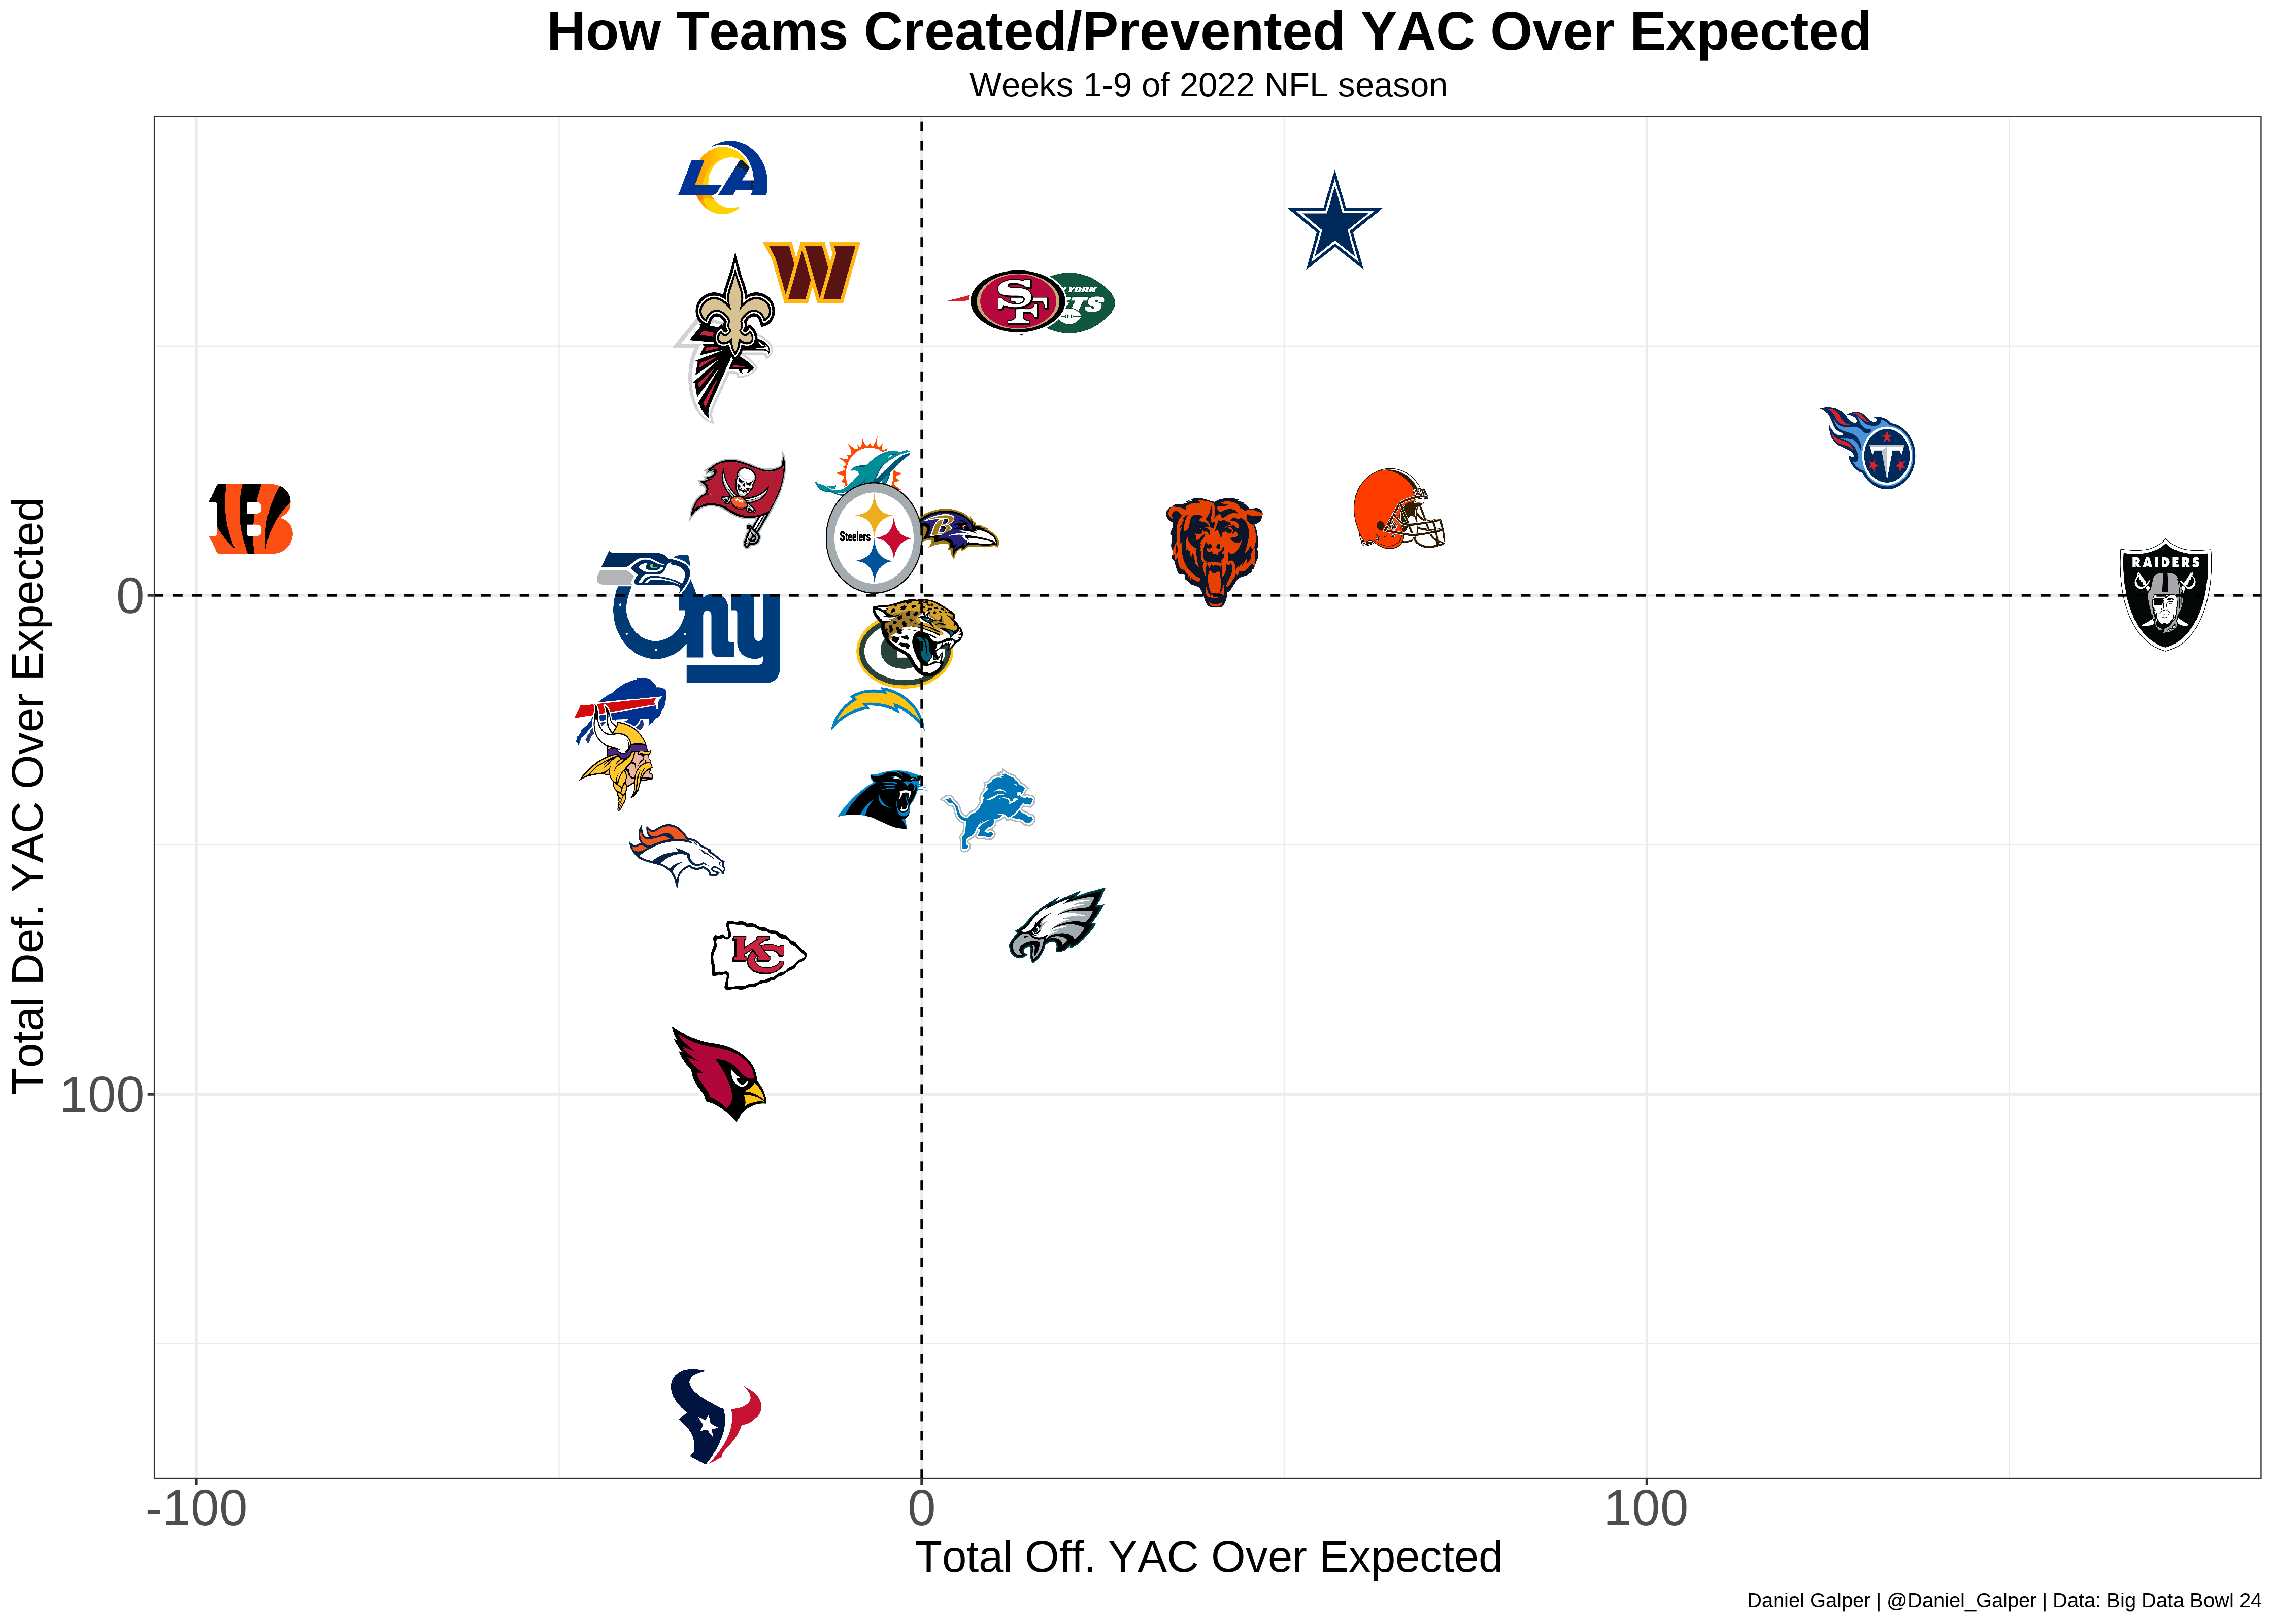

In [5]:
width = 1000
height = 900

# Display the image with the specified width and height
image_path = "/kaggle/input/bdb-data-viz/data_viz/yac-team-level.png"
display(Image(filename=image_path, width=width, height=height))

Houston had the worst YAC Over Expected differential in the NFL as easily the worst defense at preventing YAC Over Expected. 


**D. Model Shortcomings**

The YAC Over Expected model isn’t able to account for all contextual factors that are important in building an accurate YAC expectation. The main variable that is not included in the model is the proximity of other defenders at the moment of first contact, which surely has a significant impact on the expected YAC due to the defenses ability to quickly make a second tackle attempt if a ball carrier breaks free. I decided to refrain from including some indicator of secondary defender locations because the principal goal of the model was player evaluation and including that variable would cause defenders to be punished or rewarded for the play of their teammates. 

As a result of this decision, some first contact defenders have their YAC Over Expected numbers impacted by the performance and locations of secondary defenders, which is why YAC Over Expected Success Rate may be a better measure of defender skill level. 

Another downside is that ball carriers are not fully rewarded for breaking additional tackles as the model doesn’t fully account for what should be expected of them after that moment of first contact. However, their performance after the moment of first contact still shows up in their YAC Over Expected numbers, although they are not fully adjusted for the location of secondary defenders. 

Additionally, some players are better at putting themselves in positions to win the YAC battle at the moment of first contact. Most obvious is the importance of player speed, which the model bakes into its projections. As a result, a faster player will have a more favorable YAC expectation and will receive less reward for the actual YAC value produced because of it. The same can be said for player orientation and angle as some players are better at putting themselves in optimal physical positions, which they are not rewarded for because the model factors that into its expectations. 


# III. Conclusion and Future Work

Overall, the YAC Over Expected model does a great job adjusting for important factors that impact how many YAC should be generated on a certain play. Because of this, it is able to isolate and analyze player ability to generate and prevent YAC given a play's circumstances, which can be scaled up to a team-level.

The significance of certain variables also sheds light on how players can put themselves in better positions to limit or generate more YAC. Namely, the model highlights the importance of optimal orientation and angles of movement at the moment of first contact. Coaches should emphasize to their offensive players the importance of orienting their bodies and motion upfield when preparing for first contact while teaching the exact opposite to their defenders, who want to drive a ball carrier directly back towards their own end zone. 

There may even be cases where an upfield facing defender should refrain from attempting to tackle a ball carrier if a teammate is in a more optimal physical position to limit YAC. I’d love to investigate these cases in a follow-up project.

All of my code can be found open-source on my [Github](https://github.com/dgalper/bdb_24).
